# Exploratory Data Analysis on Spotify 2023 Dataset

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('spotify-2023.csv', encoding='latin-1')
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


### Overview of Dataset

In [13]:
# Getting the number of rows and columns
num_rows, num_columns = df.shape

# Creating a DataFrame for the dataset overview
overview_df = pd.DataFrame({
    'Overview': ['Number of Rows', 'Number of Columns'],
    'Count': [num_rows, num_columns]
})

# Displaying the tables with proper formatting
print("Dataset Overview:")
display(overview_df.style.set_table_attributes('style="width: 30%; margin: 0 auto;"'))

Dataset Overview:


,Overview,Count
0,Number of Rows,953
1,Number of Columns,24


In [15]:
# Getting the data types of each column
data_types_df = pd.DataFrame(df.dtypes).reset_index()
data_types_df.columns = ['Column Name', 'Data Type']

print("\nData Types of Each Column:")
display(data_types_df.style.set_table_attributes('style="width: 50%; margin: 0 auto;"'))


Data Types of Each Column:


,Column Name,Data Type
0,track_name,object
1,artist(s)_name,object
2,artist_count,int64
3,released_year,int64
4,released_month,int64
5,released_day,int64
6,in_spotify_playlists,int64
7,in_spotify_charts,int64
8,streams,object
9,in_apple_playlists,int64


In [179]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values_df = pd.DataFrame(missing_values[missing_values > 0]).reset_index()
missing_values_df.columns = ['Column Name', 'Missing Values']

if not missing_values_df.empty:
    print("\nMissing Values in Each Column:")
    display(missing_values_df.style.set_table_attributes('style="width: 50%; margin: 0 auto;"'))
else:
    print("\nNo missing values in the dataset.")


Missing Values in Each Column:


,Column Name,Missing Values
0,in_shazam_charts,50
1,key,95


### Basic Descriptive Statistics

In [17]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df = df.dropna(subset=['streams'])  

streams_mean = df['streams'].mean()
streams_median = df['streams'].median()
streams_std = df['streams'].std()

print("Mean:", streams_mean)
print("Median:", streams_median)
print("Standard Deviation:", streams_std)

Mean: 514137424.93907565
Median: 290530915.0
Standard Deviation: 566856949.0388832


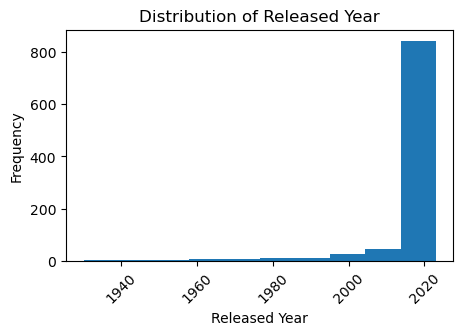

In [19]:
# Plotting the distribution of released_year
plt.figure(figsize=(5, 3))
df['released_year'].plot.hist()
plt.title("Distribution of Released Year")
plt.xlabel("Released Year")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

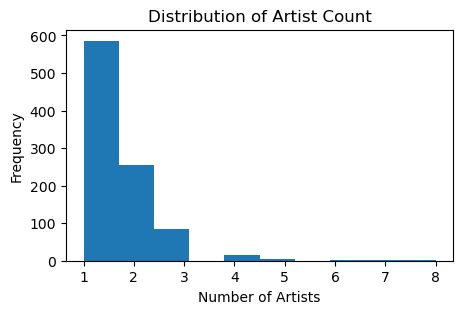

In [23]:
# Plotting the distribution of artist_count
plt.figure(figsize=(5, 3))
df['artist_count'].plot.hist()
plt.title("Distribution of Artist Count")
plt.xlabel("Number of Artists")
plt.ylabel("Frequency")
plt.show()

### Top Performers

In [25]:
# Finding the track with the highest number of streams
top_track = df.loc[df['streams'].idxmax()]
top_track_df = top_track[['track_name', 'artist(s)_name', 'streams']].to_frame().T  # Convert Series to DataFrame

print("Track with the Highest Number of Streams:")
display(top_track_df)

# Displaying the top 5 most streamed tracks
top_5_tracks = df.nlargest(5, 'streams')[['track_name', 'artist(s)_name', 'streams']]
print("\nTop 5 Most Streamed Tracks:")
display(top_5_tracks)

Track with the Highest Number of Streams:


,track_name,artist(s)_name,streams
55,Blinding Lights,The Weeknd,3703895074.0



Top 5 Most Streamed Tracks:


,track_name,artist(s)_name,streams
55,Blinding Lights,The Weeknd,3.703895e+09
179,Shape of You,Ed Sheeran,3.562544e+09
86,Someone You Loved,Lewis Capaldi,2.887242e+09
620,Dance Monkey,Tones and I,2.864792e+09
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2.808097e+09


In [27]:
# Finding the top 5 most frequent artists
top_artists = df['artist(s)_name'].value_counts().nlargest(5).reset_index()  # Resetting index for better formatting
top_artists.columns = ['artist(s)_name', 'track_count']  # Renaming columns for clarity

print("\nTop 5 Most Frequent Artists:")
display(top_artists)


Top 5 Most Frequent Artists:


,artist(s)_name,track_count
0,Taylor Swift,34
1,The Weeknd,22
2,Bad Bunny,19
3,SZA,19
4,Harry Styles,17


### Temporal Trends

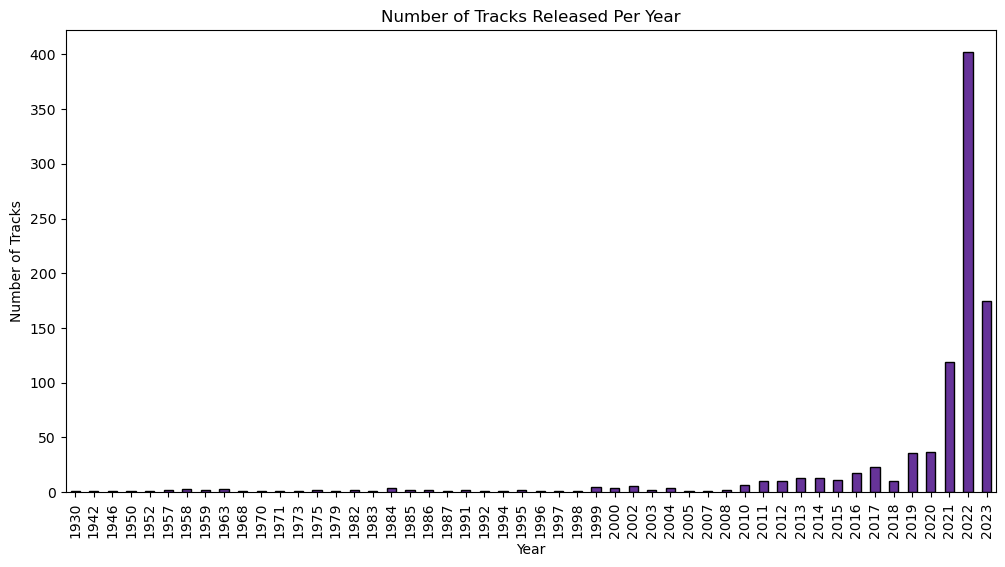

In [55]:
# Plot number of tracks released per year
plt.figure(figsize=(12, 6))
df['released_year'].value_counts().sort_index().plot(kind='bar', color='rebeccapurple', edgecolor='black')
plt.title('Number of Tracks Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.show()

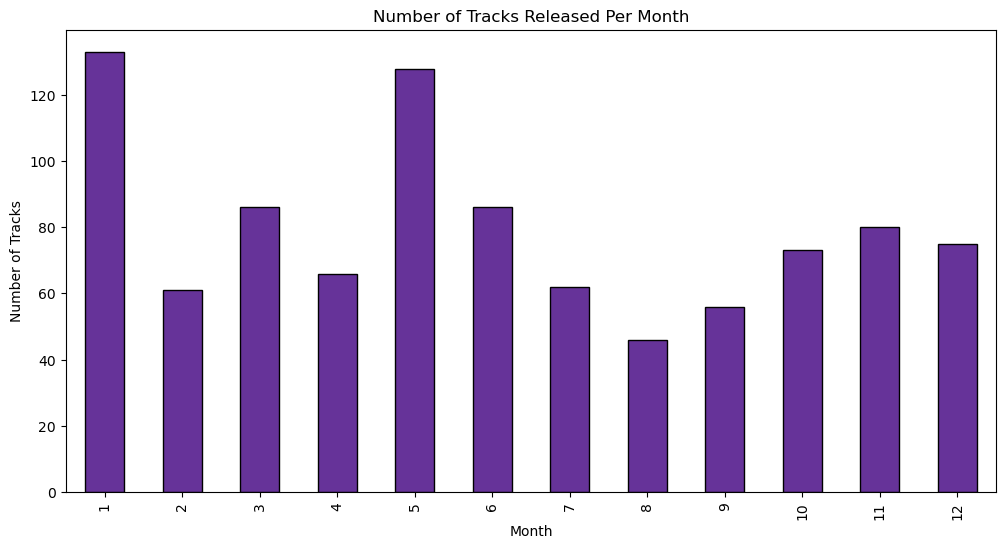

In [57]:
# Plot number of tracks released per month
plt.figure(figsize=(12, 6))
df['released_month'].value_counts().sort_index().plot(kind='bar', color='rebeccapurple', edgecolor='black')
plt.title('Number of Tracks Released Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Tracks')
plt.show()

### Genre and Music Characteristics

In [39]:
# Correlation Analysis
correlation_matrix = df[['streams', 'bpm', 'danceability_%', 'energy_%', 'valence_%', 'acousticness_%']].corr()

# Convert the correlation matrix to a DataFrame for better display
correlation_table = correlation_matrix.round(2)  # Round for better readability
correlation_table = correlation_table.reset_index()  # Reset index to make it more table-like
correlation_table.columns = [''] + correlation_table.columns[1:].tolist()  # Add empty column for aesthetics

# Display the correlation table
print("Correlation Matrix:")
display(correlation_table)  # Using display for better formatting in Jupyter

Correlation Matrix:


,,streams,bpm,danceability_%,energy_%,valence_%,acousticness_%
0,streams,1.00,-0.00,-0.11,-0.03,-0.04,-0.00
1,bpm,-0.00,1.00,-0.15,0.03,0.04,-0.02
2,danceability_%,-0.11,-0.15,1.00,0.20,0.41,-0.24
3,energy_%,-0.03,0.03,0.20,1.00,0.36,-0.58
4,valence_%,-0.04,0.04,0.41,0.36,1.00,-0.08
5,acousticness_%,-0.00,-0.02,-0.24,-0.58,-0.08,1.00


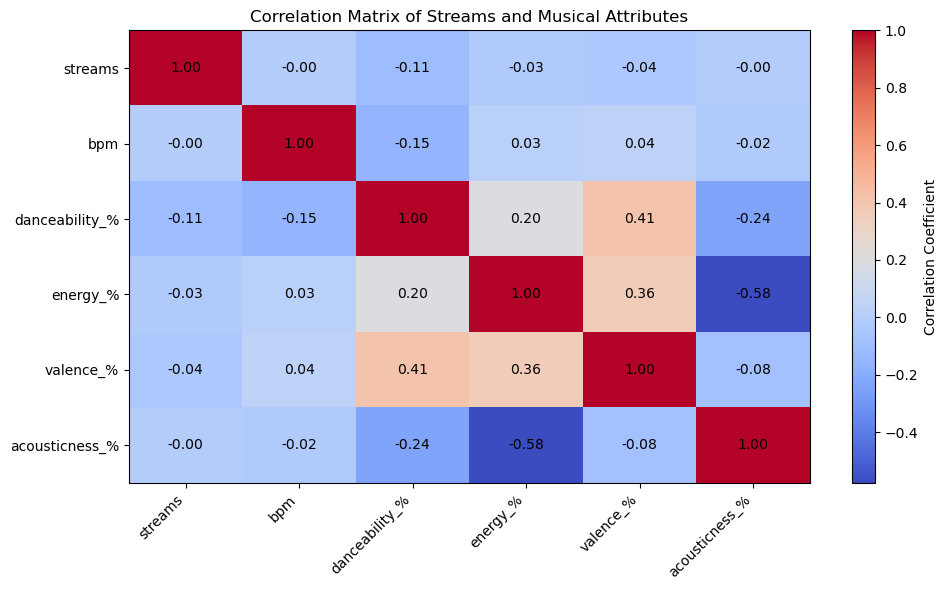

In [41]:
# Create the heatmap
plt.figure(figsize=(10, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')

# Adding the color bar for reference
plt.colorbar(label='Correlation Coefficient')

# Adding annotations for each cell in the heatmap
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha="center", va="center", color="black")

# Adding labels
plt.xticks(range(correlation_matrix.shape[1]), correlation_matrix.columns, rotation=45, ha="right")
plt.yticks(range(correlation_matrix.shape[0]), correlation_matrix.index)

# Title for the heatmap
plt.title('Correlation Matrix of Streams and Musical Attributes')
plt.tight_layout()
plt.show()

In [43]:
# Extracting specific correlations
dance_energy_corr = correlation_matrix.loc['danceability_%', 'energy_%']
valence_acousticness_corr = correlation_matrix.loc['valence_%', 'acousticness_%']

print(f"Correlation between Danceability and Energy: {dance_energy_corr:.2f}")
print(f"Correlation between Valence and Acousticness: {valence_acousticness_corr:.2f}")

Correlation between Danceability and Energy: 0.20
Correlation between Valence and Acousticness: -0.08


### Platform Popularity

In [45]:
# Compare the number of tracks in different playlists
platform_counts = {
    'Spotify Playlists': df['in_spotify_playlists'].sum(),
    'Spotify Charts': df['in_spotify_charts'].sum(),
    'Apple Playlists': df['in_apple_playlists'].sum()
}

# Create a DataFrame for better visualization
platform_counts_df = pd.DataFrame(platform_counts.items(), columns=['Platform', 'Number of Tracks'])

# Display the platform counts table
print("Number of Tracks in Different Platforms:")
display(platform_counts_df)  # Using display for better formatting in Jupyter

Number of Tracks in Different Platforms:


,Platform,Number of Tracks
0,Spotify Playlists,4952842
1,Spotify Charts,11445
2,Apple Playlists,64609


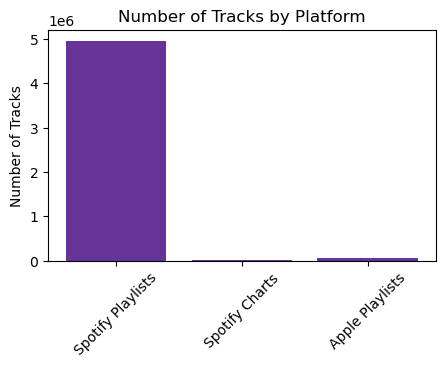

In [59]:
# Plotting the platform popularity
plt.figure(figsize=(5, 3))
plt.bar(platform_counts_df['Platform'], platform_counts_df['Number of Tracks'], color='rebeccapurple')
plt.title('Number of Tracks by Platform')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.show()

### Advanced Analysis

In [53]:
# Average streams by key
average_streams_by_key = df.groupby('key')['streams'].mean().sort_values(ascending=False).reset_index()
average_streams_by_key.columns = ['Key', 'Average Streams']
print("Average Streams by Key:")
display(average_streams_by_key)  # Display as a table


Average Streams by Key:


,Key,Average Streams
0,C#,6.042802e+08
1,E,5.774972e+08
2,D#,5.530365e+08
3,A#,5.524754e+08
4,D,5.295256e+08
5,F#,5.223632e+08
6,B,5.193480e+08
7,G#,4.769119e+08
8,F,4.684464e+08
9,G,4.525994e+08
